In [34]:
import os
import cv2
import tensorflow as tf
import pandas as pd
import numpy as np
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.optimizers import rmsprop_v2
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, MaxPooling2D,MaxPool2D ,UpSampling2D, Flatten, Input
from keras import backend as K

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#path = "/content/drive/MyDrive/MHD"
train_images = sorted(os.listdir('/content/drive/MyDrive/MHD'))

In [5]:
train_image = []
for im in train_images:
    img = image.load_img('/content/drive/MyDrive/MHD/'+ im, target_size=(86,86))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
train_df = np.array(train_image)

In [6]:
def speckle_noise(image):
  row,col,ch = image.shape
  gauss = np.random.randn(row,col,ch)
  gauss = gauss.reshape(row,col,ch)        
  noisy = image + image * gauss
  return noisy

In [45]:
noised_df= []

for img in train_df:
    noisy= speckle_noise(img)
    noised_df.append(noisy)

In [46]:
noised_df= np.array(noised_df)

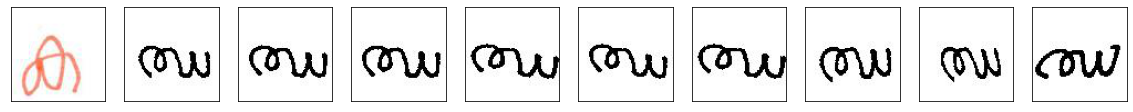

In [110]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test_og[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

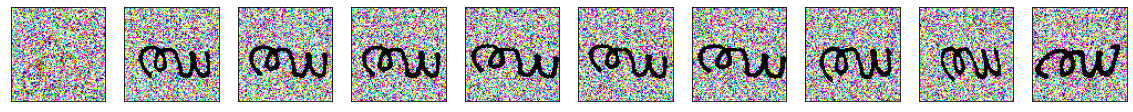

In [123]:
n = 10
plt.figure(figsize=(20,4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [102]:
x_train_og=train_df[:1300]
x_test_og=train_df[1300:]

In [47]:
noised_df.shape

(1500, 86, 86, 3)

In [62]:
x_train=noised_df[0:1300]
x_test=noised_df[1300:]

In [90]:
x_test.shape

(200, 86, 86, 3)

In [114]:
input_img = keras.Input(shape=(86,86,3))
encoded= layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded= layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded= layers.Conv2D(32, (3, 3), activation='relu', padding='same')(decoded)
decoded = layers.Dense(3, activation='sigmoid')(decoded)

In [115]:
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [116]:
autoencoder.fit(x_train, x_train_og,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test_og))

Epoch 1/50
6/6 [==============================] - 42s 1s/step - loss: 0.6284 - val_loss: 0.3250
Epoch 2/50
6/6 [==============================] - 4s 672ms/step - loss: 0.2100 - val_loss: 0.2702
Epoch 3/50
6/6 [==============================] - 4s 676ms/step - loss: 0.2265 - val_loss: 0.1840
Epoch 4/50
6/6 [==============================] - 4s 673ms/step - loss: 0.1552 - val_loss: 0.1802
Epoch 5/50
6/6 [==============================] - 4s 672ms/step - loss: 0.1582 - val_loss: 0.1581
Epoch 6/50
6/6 [==============================] - 4s 673ms/step - loss: 0.1434 - val_loss: 0.1599
Epoch 7/50
6/6 [==============================] - 4s 676ms/step - loss: 0.1372 - val_loss: 0.1445
Epoch 8/50
6/6 [==============================] - 4s 688ms/step - loss: 0.1280 - val_loss: 0.1317
Epoch 9/50
6/6 [==============================] - 4s 678ms/step - loss: 0.1140 - val_loss: 0.1141
Epoch 10/50
6/6 [==============================] - 4s 678ms/step - loss: 0.0980 - val_loss: 0.0978
Epoch 11/50
6/6 [====

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

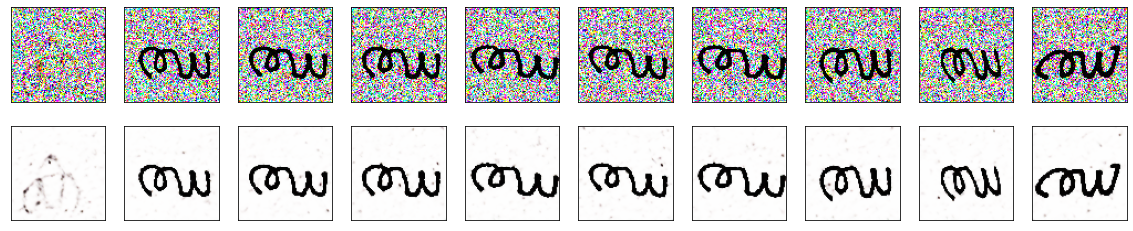

In [124]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()